## Data visualization & pre-processing

In [1]:
import os
# Data directory
data_dir = '../Dataset/aerialsatellite-images-of-rooftops-with-labels'
# Path to the folder containing the .tif images
images_folder = os.path.join(data_dir, 'images/images')
# Path to the folder containing the .tif label images
label_folder = os.path.join(data_dir, 'label/label')

#### Data visualization

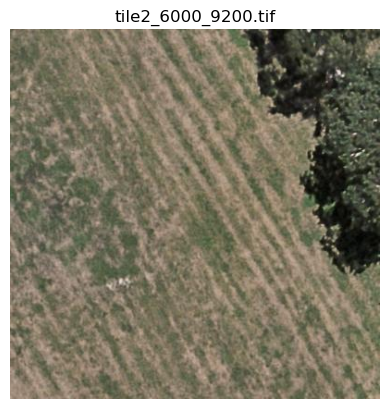

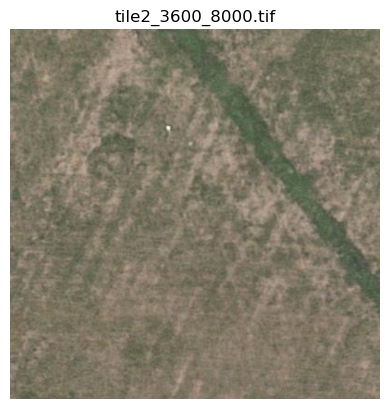

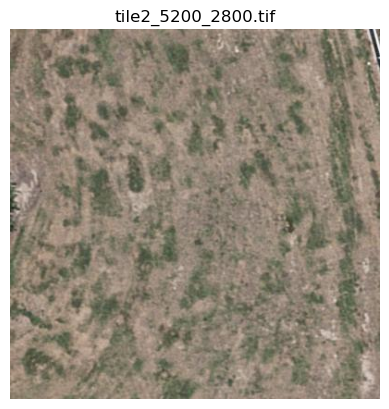

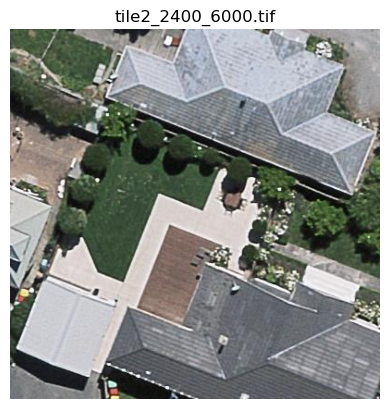

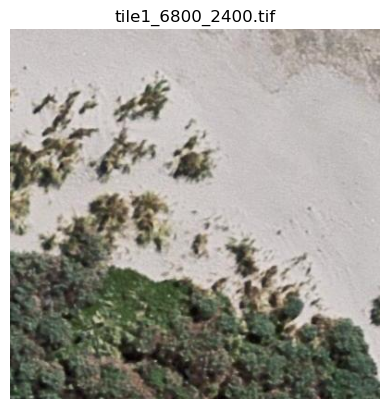

In [2]:
# Viewing the images
import os
from PIL import Image
import matplotlib.pyplot as plt

# Listing all files in the directory
all_files = os.listdir(images_folder)

# Filtering only .tif files
tif_files = [f for f in all_files if f.endswith('.tif')]

# Displaying each .tif image
count = 0
for tif_file in tif_files:
    image_path = os.path.join(images_folder, tif_file)
    
    # Opening the image
    tif_image = Image.open(image_path)
    
    # Displaying the image using matplotlib
    plt.imshow(tif_image)
    plt.title(tif_file)  
    plt.axis('off')     
    plt.show()

    count += 1
    if(count == 10):
        break


In [3]:
# Reading the images using OpenCV
import os
import cv2
import matplotlib.pyplot as plt

# List all files in the directory
all_files = os.listdir(images_folder)

# Filter only .tif files
tif_files = [f for f in all_files if f.endswith('.tif')]

# Reading each image file
count = 0
for tif_file in tif_files:
    # image_path = os.path.join(images_folder, tif_file)

    # image = cv2.imread(image_path, 1)

    # Displaying the shape of image
    # print(image.shape)
    count += 1
print(f"Total number of satellite images: {count}")



Total number of satellite images: 1671


The shape of each image is [400, 400, 3]

Perform data analysis below

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Data directories
data_dir = '../Dataset/aerialsatellite-images-of-rooftops-with-labels'
images_folder = os.path.join(data_dir, 'images/images')
label_folder = os.path.join(data_dir, 'label/label')

# Listing image and label files
image_files = sorted([f for f in os.listdir(images_folder) if f.endswith('.tif')])
label_files = sorted([f for f in os.listdir(label_folder) if f.endswith('.tif')])

# Creating a set of label file names without the "_label" suffix for easy matching
label_files_no_suffix = {f.replace('_label', '') for f in label_files}

print(f"Total number of images: {len(image_files)}")
print(f"Total number of labels: {len(label_files)}")

# Function to display image and mask side by side
def show_image_and_mask(image, mask):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image)
    axs[0].set_title('Rooftop Image')
    axs[0].axis('off')

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')

    plt.show()
def show_rooftop_contours(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)  # Red contours on the image

    plt.imshow(image)
    plt.title("Rooftop Contours")
    plt.axis('off')
    plt.show()


# Variables to store analysis data
rooftop_areas = []

# Analyzing images and labels
count = 0
for img_file in image_files:

    label_file = img_file.replace('.tif', '_label.tif')
        
    if label_file in label_files:
        # Reading image
        img_path = os.path.join(images_folder, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
        
        # Reading corresponding label (mask)
        label_path = os.path.join(label_folder, label_file)
        mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # Grayscale mask
        
        # Checking unique values in mask
        unique_values = np.unique(mask)
        print(f"Unique values in mask: {unique_values}")
        
        # Calculating rooftop area
        total_pixels = mask.size
        rooftop_pixels = np.sum(mask == 255)  # Counting rooftop pixels
        rooftop_percentage = (rooftop_pixels / total_pixels) * 100 if total_pixels > 0 else 0
        rooftop_areas.append(rooftop_percentage)
        print(f"Rooftop area: {rooftop_percentage:.2f}%")

        # Displaying the image and mask side by side
        # show_image_and_mask(image, mask)

        if(rooftop_percentage > 50):
            show_image_and_mask(image, mask)
            show_rooftop_contours(image, mask)

# Plotting distribution of rooftop areas
plt.figure(figsize=(8, 6))
plt.hist(rooftop_areas, bins=10, color='blue', edgecolor='black')
plt.title("Distribution of Rooftop Areas")
plt.xlabel("Rooftop Area (%)")
plt.ylabel("Frequency")
plt.show()


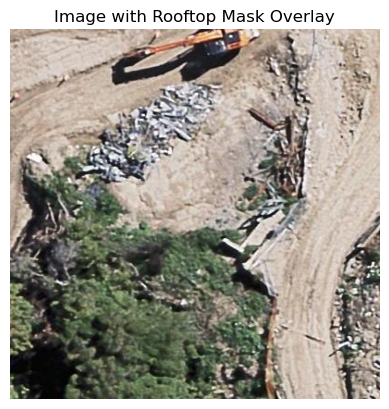

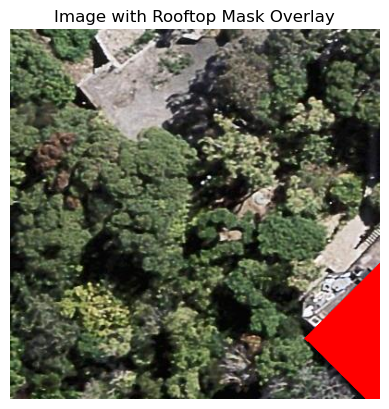

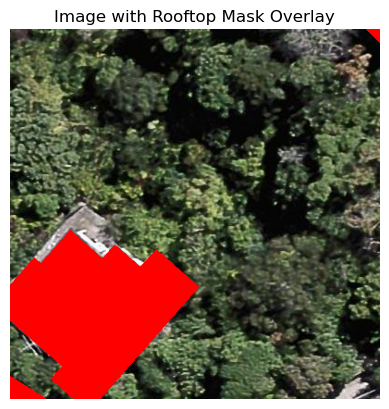

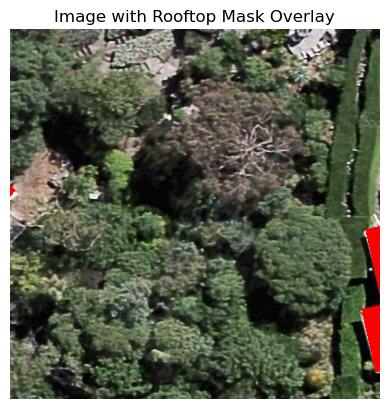

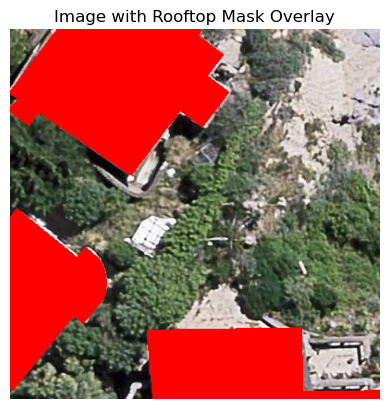

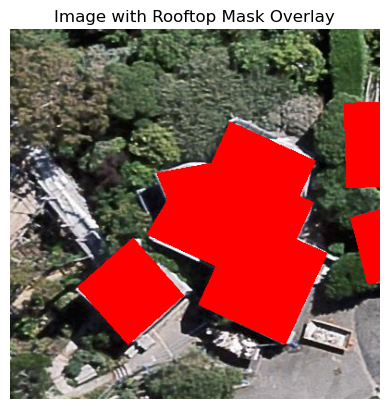

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Data directory
data_dir = '../Dataset/aerialsatellite-images-of-rooftops-with-labels'
images_folder = os.path.join(data_dir, 'images/images')
label_folder = os.path.join(data_dir, 'label/label')

# Listing image and label files
image_files = sorted([f for f in os.listdir(images_folder) if f.endswith('.tif')])
label_files = sorted([f for f in os.listdir(label_folder) if f.endswith('.tif')])

# Creating a set of label file names without the "_label" suffix for easy matching
label_files_no_suffix = {f.replace('_label', '') for f in label_files}

# Function to display overlay of image and mask
def show_overlay(image, mask):
    overlay = image.copy()
    overlay[mask == 255] = [255, 0, 0]  # Highlighting the rooftop areas in red
    plt.imshow(overlay)
    plt.title("Image with Rooftop Mask Overlay")
    plt.axis('off')
    plt.show()

# Displaying overlay for 10 images
for img_file in image_files[:10]:  # Displaying for the first 10 images
    # Checking if the corresponding label exists
    label_file = img_file.replace('.tif', '_label.tif')
    
    if label_file in label_files:
        # Reading image
        img_path = os.path.join(images_folder, img_file)
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

        # Reading corresponding label (mask)
        label_path = os.path.join(label_folder, label_file)
        mask = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # Grayscale mask

        # Showing the overlay of the image and mask
        show_overlay(image, mask)

    else:
        print(f"Label not found for {img_file}")


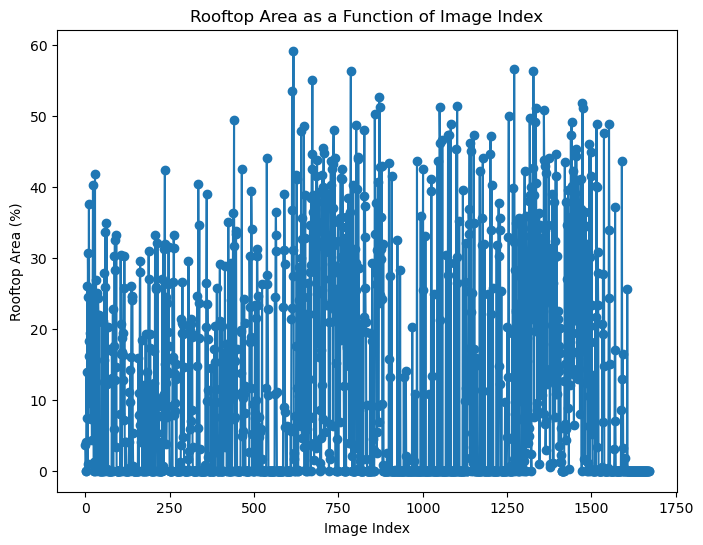

In [7]:
# Rooftop Area as a Function of Image Index
plt.figure(figsize=(8, 6))
plt.plot(range(len(rooftop_areas)), rooftop_areas, marker='o', linestyle='-')
plt.title('Rooftop Area as a Function of Image Index')
plt.xlabel('Image Index')
plt.ylabel('Rooftop Area (%)')
plt.show()


#### Data Pre-processing

Data Preprocessing Steps:

1) Ensuring data alignment
2) Handling missing masks
3) Resizing images and masks
4) Converting to Tensors
5) Normalizing images
6) Creating DataLoader for training the ML model

Resizing images and masks, converting to Tensors and normalizing images can be done using a single image preprocessing pipeline, specifically using torchvision.transforms

But before normalizing, we first need to calculate the mean and standard deviation of the pixel values in our dataset.

Normalization will only be done for satellite images and not the masks.

In [8]:
import os
# Data directory
data_dir = '../Dataset/aerialsatellite-images-of-rooftops-with-labels'
# Path to the folder containing the .tif images
images_folder = os.path.join(data_dir, 'images/images')
# Path to the folder containing the .tif label images
label_folder = os.path.join(data_dir, 'label/label')

In [9]:
# calculating the mean and standard deviation of the pixel values in our dataset.
import os
import cv2
import torch
import numpy as np
from torchvision import transforms
from tqdm import tqdm 

# Listing image files
image_files = sorted([f for f in os.listdir(images_folder) if f.endswith('.tif')])

# Initializing lists to store pixel values for each channel
pixel_values_r = []
pixel_values_g = []
pixel_values_b = []

# Transformation to convert to tensor (scales to [0, 1])
transform = transforms.ToTensor()

# Looping through all images to calculate mean and std
for img_file in tqdm(image_files):
    # Loading image using OpenCV
    img_path = os.path.join(images_folder, img_file)
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
    
    # Converting image to tensor
    img_tensor = transform(image)
    
    # Separating the R, G, B channels
    pixel_values_r.append(img_tensor[0].numpy().flatten())  # Red channel
    pixel_values_g.append(img_tensor[1].numpy().flatten())  # Green channel
    pixel_values_b.append(img_tensor[2].numpy().flatten())  # Blue channel

# Concatenating all pixel values into a single array for each channel
pixel_values_r = np.concatenate(pixel_values_r)
pixel_values_g = np.concatenate(pixel_values_g)
pixel_values_b = np.concatenate(pixel_values_b)

# Calculating the mean and standard deviation for each channel
mean_r, std_r = pixel_values_r.mean(), pixel_values_r.std()
mean_g, std_g = pixel_values_g.mean(), pixel_values_g.std()
mean_b, std_b = pixel_values_b.mean(), pixel_values_b.std()

# Printing the calculated mean and standard deviation
print(f"Mean (R, G, B): {mean_r}, {mean_g}, {mean_b}")
print(f"Std (R, G, B): {std_r}, {std_g}, {std_b}")


100%|██████████| 1671/1671 [00:14<00:00, 115.96it/s]


Mean (R, G, B): 0.45518845319747925, 0.46095049381256104, 0.42267000675201416
Std (R, G, B): 0.20898602902889252, 0.19114986062049866, 0.2026560753583908


Performing resizing, converting to Tensors and normalizing

In [18]:
import os
import cv2
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt


# Listing image and label files
image_files = sorted([f for f in os.listdir(images_folder) if f.endswith('.tif')])
label_files = sorted([f for f in os.listdir(label_folder) if f.endswith('.tif')])


# Target resolution
target_resolution = (400, 400)

# PyTorch transformations for images
image_transform = transforms.Compose([
    transforms.Resize(target_resolution),  # Resizing to 400x400
   # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random brightness, contrast, saturation, hue
    transforms.ToTensor(),  # Converting to tensor (scales to [0, 1])
    transforms.Normalize([float(mean_r), float(mean_g), float(mean_b)], [float(std_r), float(std_g), float(std_b)])
])

# PyTorch transformations for masks (no normalization, just resizing)
mask_transform = transforms.Compose([
    transforms.Resize(target_resolution),  # Resizing to 400x400
    transforms.ToTensor()  # Converting to tensor
])


num_samples = 5  # Number of samples to visualize
processed_images = []
processed_masks = []

count_processed_images = 0
for img_file in image_files:
    label_file = img_file.replace('.tif', '_label.tif')
    
   
    if label_file in label_files:
        # Loading image
        img_path = os.path.join(images_folder, img_file)
        image = Image.open(img_path).convert('RGB')  # Convert to RGB format

        # Loading mask
        label_path = os.path.join(label_folder, label_file)
        mask = Image.open(label_path).convert('L')  # Convert mask to grayscale

        # Applying the transformations
        image_resized = image_transform(image)  # Resize and normalize the image
        mask_resized = mask_transform(mask)  # Resize the mask (no normalization needed for mask)

        
        print(f"Processed image: {img_file}, mask: {label_file}")
        count_processed_images += 1
        # Storing a few samples for visualization
        if len(processed_images) < num_samples:
            # Storing the processed images and masks for visualization
            processed_images.append(image_resized)
            processed_masks.append(mask_resized)
    else:
        print(f"Label not found for image: {img_file}")

print(f"Total processed images: {count_processed_images}")

# Unnormalizing the images for visualization
def unnormalize(tensor, mean, std):
    """Unnormalizing a tensor image."""
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)  # Scale back to the original range
    return tensor

# Visualizing the processed images
def show_samples(images, masks):
    num_samples = len(images)
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i * 2 + 1)
        
        # Unnormalizing the image
        unnormalized_image = unnormalize(images[i].clone(), 
                                         torch.tensor([mean_r, mean_g, mean_b]), 
                                         torch.tensor([std_r, std_g, std_b]))

        # Clipping the values to [0, 1]
        unnormalized_image = torch.clamp(unnormalized_image, 0, 1)

        plt.imshow(unnormalized_image.permute(1, 2, 0))  # Converting tensor to HWC format for displaying
        plt.axis('off')
        plt.title('Augmented Image')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(masks[i].squeeze(0), cmap='gray')  # Displaying mask in grayscale
        plt.axis('off')
        plt.title('Augmented Mask')

    plt.tight_layout()
    plt.show()

# Showing the processed samples
show_samples(processed_images, processed_masks)



Processed image: tile1_0_0.tif, mask: tile1_0_0_label.tif
Processed image: tile1_0_1200.tif, mask: tile1_0_1200_label.tif
Processed image: tile1_0_1600.tif, mask: tile1_0_1600_label.tif
Processed image: tile1_0_2000.tif, mask: tile1_0_2000_label.tif
Processed image: tile1_0_2400.tif, mask: tile1_0_2400_label.tif
Processed image: tile1_0_2800.tif, mask: tile1_0_2800_label.tif
Processed image: tile1_0_3200.tif, mask: tile1_0_3200_label.tif
Processed image: tile1_0_3600.tif, mask: tile1_0_3600_label.tif
Processed image: tile1_0_400.tif, mask: tile1_0_400_label.tif
Processed image: tile1_0_4000.tif, mask: tile1_0_4000_label.tif
Processed image: tile1_0_4400.tif, mask: tile1_0_4400_label.tif
Processed image: tile1_0_4800.tif, mask: tile1_0_4800_label.tif
Processed image: tile1_0_5200.tif, mask: tile1_0_5200_label.tif
Processed image: tile1_0_5600.tif, mask: tile1_0_5600_label.tif
Processed image: tile1_0_6000.tif, mask: tile1_0_6000_label.tif
Processed image: tile1_0_6400.tif, mask: tile1_0

creating a custom Dataset class and DataLoader for feeding our data into the model efficiently during training.

In [19]:
from torch.utils.data import Dataset, DataLoader

# Custom Dataset class for satellite images and masks
class RooftopDataset(Dataset):
    def __init__(self, images_folder, label_folder, image_files, label_files, image_transform, mask_transform):
        self.images_folder = images_folder
        self.label_folder = label_folder
        self.image_files = image_files
        self.label_files = label_files
        self.image_transform = image_transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_file = self.image_files[idx]
        label_file = img_file.replace('.tif', '_label.tif')

        # Loading image and mask
        img_path = os.path.join(self.images_folder, img_file)
        label_path = os.path.join(self.label_folder, label_file)

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(label_path).convert('L')

        # Applying transformations
        image = self.image_transform(image)
        mask = self.mask_transform(mask)

        return image, mask

# Creating Dataset
dataset = RooftopDataset(images_folder, label_folder, image_files, label_files, image_transform, mask_transform)

# Creating DataLoader
batch_size = 8  # Adjust the batch size as per your needs
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Test DataLoader to see if it works
for images, masks in dataloader:
    print(f'Image batch shape: {images.shape}')
    print(f'Mask batch shape: {masks.shape}')
    break 


Image batch shape: torch.Size([8, 3, 400, 400])
Mask batch shape: torch.Size([8, 1, 400, 400])
